# Behavior of the perceptron convergence

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

#matplotlib.rc("savefig", dpi=150)

In [4]:
def fetch_iris_data():
    '''
    Fetch data from an internet archive and save as file `iris.csv`.
    '''

    df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
                     header=None)
    df.to_csv('iris.csv', header=None, index=False)

    return

In [5]:
def load_iris_data():
    ''' 
    Fetches 2d data points from the iris data from the internet archive and
    return (X, Y), where X is a list of 2d points and Y a list of labels.
    '''
   
    # fetch data from internet archive
    df = pd.read_csv('iris.csv', header=None)
    
    # as feature we take the first two data entries,
    # which are sepal length and width
    X = df.iloc[:, 0:2].values

    # read class labels and convert them to numers as follow:
    # `iris-setosa` set to value -1, `iris-versicol` as well as `iris-virginica` to value 1
    Y = df.iloc[:, 4].values 
    Y = np.where(Y == 'Iris-setosa', -1, 1)
    
    # to make it more realistic, we randomize the data
    indices = np.random.permutation(len(X))
    X_rand = [X[i] for i in indices]
    Y_rand = [Y[i] for i in indices]

    # return the randomized lists as numpy arrays
    return np.array(X_rand), np.array(Y_rand)

In [6]:
def plot_data(X, Y):
    '''
    Plot the data X, setosa in red, and others in blue.
    '''

    # divide data depedning on the label: iris-setosa or other
    X_setosa = []
    X_other = []
    for x, y in zip(X, Y):
        if y == -1:
            X_setosa.append(x)
        else:
            X_other.append(x)
   
    # convert to numpy array
    X_setosa = np.array(X_setosa)
    X_other = np.array(X_other)

    # plot the two lists with different styles
    plt.scatter(X_setosa[:, 0], X_setosa[:, 1], color='red', marker='o', label='setosa')
    plt.scatter(X_other[:, 0], X_other[:, 1], color='blue', marker='o', label='other')

    # decorate plot
    plt.xlabel('sepal length')
    plt.ylabel('sepal width')
    plt.legend(loc='upper right')

    return

In [7]:
class Perceptron:

    def __init__(self, num):
        '''
        initialize class for `num` input signals
        '''

        # weights of the perceptron, initialized to zero
        # note the '1 + ' as the first weight entry is the threshold
        self.w_ = np.zeros(1 + num)

        return
    
    def activation_input(self, X):
        '''
        calculate the activation input of the neuron
        '''
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def classify(self, X):
        '''
        classify the data by sending the activation input through a step function
        '''
        return np.where(self.activation_input(X) >= 0.0, 1, -1)

    def learn(self, X_train, Y_train, eta=0.01, epochs=10):
        '''
        fit training features X_train with labels Y_train according to learning rate
        `eta` and total number of epochs `epochs` and log the misclassifications in errors_
        '''

        # reset internal list of misclassifications for the logging
        self.train_errors_ = [] 

        # repeat `epochs` many times
        for _ in range(epochs):
            err = 0
            # for each pair of features and corresponding label
            for x, y in zip(X_train, Y_train):
                # compute the update for the weight coefficients
                update = eta * ( y - self.classify(x) )
                # update the weights
                self.w_[1:] += update * x
                # update the threshold
                self.w_[0] += update
                # increment the number of misclassifications if update is not zero
                err += int(update != 0.0)
            # append the number of misclassifications to the internal list
            self.train_errors_.append(err)
    
        return

    def plot_decision_regions(self, X, Y, X_train, Y_train, resolution):

        # set up a 2d mesh of data points with resolution `resolution`
        x1_min, x1_max = X[:, 0].min() - 2, X[:, 0].max() + 2
        x2_min, x2_max = X[:, 1].min() - 2, X[:, 1].max() + 2

        xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                               np.arange(x2_min, x2_max, resolution))

        # start new plot
        fig = plt.figure()
        axs = plt.gca()

        # make fictitious feature data out of the above 2d mesh
        x_mesh = np.array( [xx1.ravel(), xx2.ravel()] ).T
        # let the perceptron classify these features
        Z = self.classify(x_mesh)
        Z = Z.reshape(xx1.shape)

        # plot the mesh as contour plot
        axs.contourf(xx1, xx2, Z, alpha=0.4, cmap=matplotlib.colors.ListedColormap(['red', 'blue']))
        axs.set_xlim(xx1.min(), xx1.max())
        axs.set_ylim(xx2.min(), xx2.max())
        
        # sort the input data according to the flower species
        X_setosa = []
        X_other = []
        for x, y in zip(X, Y):
            if y == -1:
                X_setosa.append(x)
            else:
                X_other.append(x)

        # turn the array into numpy arrays
        X_setosa = np.array(X_setosa)
        X_other = np.array(X_other)

        # and make a scatter plot with different styles for the two different species
        axs.scatter(X_setosa[:, 0], X_setosa[:, 1], 
                    color='red', marker='.', label='Setosa')
        axs.scatter(X_other[:, 0], X_other[:, 1], 
                    color='blue', marker='.', label='Other')
        
        # sort the training data according to the flower species
        X_setosa = []
        X_other = []
        for x, y in zip(X_train, Y_train):
            if y == -1:
                X_setosa.append(x)
            else:
                X_other.append(x)

        # turn the array into numpy arrays
        X_setosa = np.array(X_setosa)
        X_other = np.array(X_other)
        
        # and make a scatter plot with different styles for the two different species
        axs.scatter(X_setosa[:, 0], X_setosa[:, 1], 
                    color='red', marker='x', label='S. training')
        axs.scatter(X_other[:, 0], X_other[:, 1], 
                    color='blue', marker='x', label='O. training')

        # add some additional annotations of the plot
        axs.set_xlabel('sepal length')
        axs.set_ylabel('sepal width')
        axs.legend(loc='upper right')
        axs.set_title('Perceptron')

        return

    def plot_train_errors(self):
        '''
        plot the number of misclassifications per epoch
        '''

        # create two list, one with epoch numbers, and one with the errors per epoch
        epochs, num_errs = np.arange(len(self.train_errors_)), np.array(self.train_errors_)

        # plot the above data
        fig = plt.figure()
        axs = plt.gca()
        axs.set_xlabel('epoch')
        axs.set_ylabel('errors')
        axs.set_title('Errors during training')
        plt.plot(epochs, num_errs)

        return

    def efficiency(self, X_test, Y_test): 
        '''
        compute the efficiency = 1 - number of misclassifications / number of data points
        '''

        err = 0
        
        # classify the test data
        Z = self.classify(X_test)
        for z, y in zip(Z, Y_test):
            err += int(z != y)

        return 1 - float(err) / len(X_test)
    
class Adaline(Perceptron):

    def learn(self, X_train, Y_train, eta=0.01, epochs=1000):
        '''
        fit training data according to eta and n_iter
        and log the errors in errors_
        '''

        # we initialize two list, each for the misclassifications and the cost function
        self.train_errors_ = []
        self.train_loss_ = []

        # for all the epoch
        for _ in range(epochs):
            # classify the traning features
            Z = self.classify(X_train)
            # count the misqualifications for the logging
            err = 0
            for z, y in zip(Z, Y_train):
                err += int(z != y)
            # ans save them in the list for later use
            self.train_errors_.append(err)
            
            # compute the activation input of the entire traning features
            output = self.activation_input(X_train)
            # and then the deviation from the labels
            delta = Y_train - output
            # the following is an implmentation of the adaline update rule
            self.w_[1:] += eta * X_train.T.dot(delta)
            self.w_[0] += eta * delta.sum()
            # and finally, we record the loss function
            loss = (delta ** 2).sum() / 2.0
            # and save it for later use
            self.train_loss_.append(loss)

        return
    
    def plot_train_loss(self):
        '''
        plots the loss function value per epoch
        '''

        # create two lists, one enumerating the epochs, the other the cost values
        epochs, num_errs = np.arange(len(self.train_loss_)), np.array(self.train_loss_)

        # plot the loss per epoch
        fig = plt.figure()
        axs = plt.gca()
        axs.set_xlabel('epoch')
        axs.set_ylabel('cost')
        axs.set_title('Loss during training')
        plt.plot(epochs, num_errs)

        return

## Dependence on learning rates

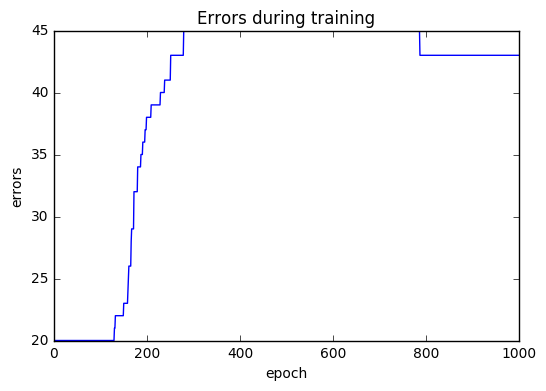

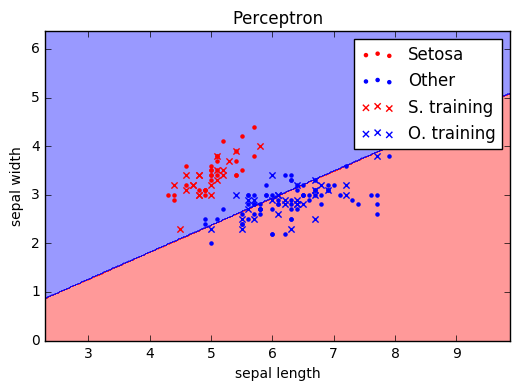

weights: [ 0.45215776 -0.6099787   1.09578276]
Efficiency (train) = 0.6
Efficiency (test)  = 0.7
Efficiency (all)   = 0.6666666666666667


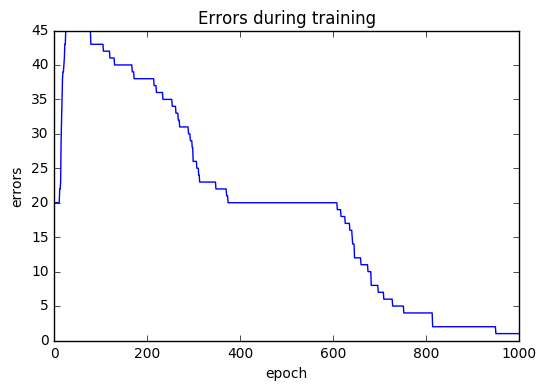

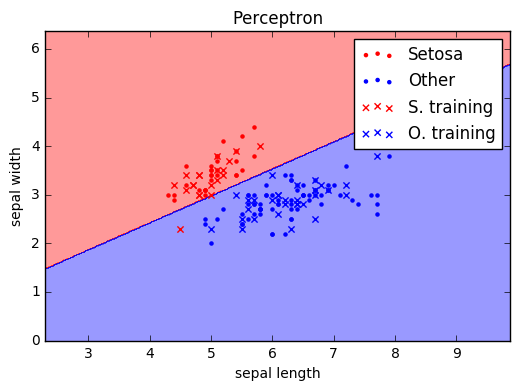

weights: [ 0.14674836  0.41865362 -0.7531783 ]
Efficiency (train) = 0.6
Efficiency (test)  = 0.7
Efficiency (all)   = 0.6666666666666667


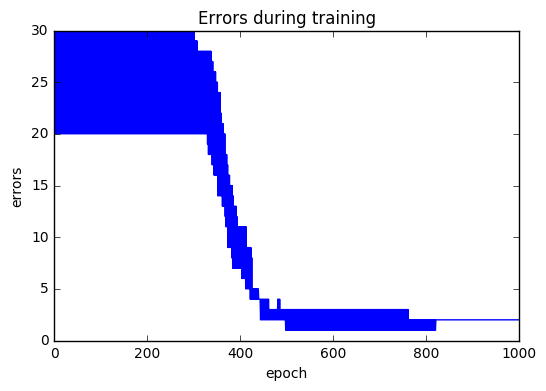

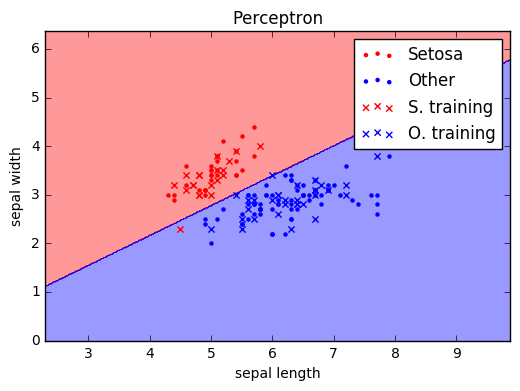

weights: [-0.39459305  0.8071659  -1.31147017]
Efficiency (train) = 0.6
Efficiency (test)  = 0.7
Efficiency (all)   = 0.6666666666666667


In [25]:
# fix the generated random numbers (2 seems to select a bad case)
np.random.seed(2)

# if you do not have the csv data file call fetch_iris_data() by removing the comment in the line below
# fetch_iris_data()

X_all, Y_all = load_iris_data()

train_samples = int( len(X_all) / 3 )

# training data
X_train, Y_train = X_all[:train_samples], Y_all[:train_samples]

# data for testing the efficiency
X, Y = X_all[train_samples:], Y_all[train_samples:]

# training
ada = Adaline(X.shape[1])
ada.w_ = np.array([1, 2, 3], dtype=np.float64)
ada.learn(X_train, Y_train, eta=0.00001, epochs=1000)
ada.plot_train_errors()
ada.plot_decision_regions(X, Y, X_train, Y_train, 0.02)
plt.show()
print('weights:', ada.w_)
print('Efficiency (train) =', eff_train)
print('Efficiency (test)  =', eff_test)
print('Efficiency (all)   =', eff_all)

ada = Adaline(X.shape[1])
ada.w_ = np.array([1, 2, 3], dtype=np.float64)
ada.learn(X_train, Y_train, eta=0.0001, epochs=1000)
ada.plot_train_errors()
ada.plot_decision_regions(X, Y, X_train, Y_train, 0.02)
plt.show()
print('weights:', ada.w_)
print('Efficiency (train) =', eff_train)
print('Efficiency (test)  =', eff_test)
print('Efficiency (all)   =', eff_all)

ada = Adaline(X.shape[1])
ada.w_ = np.array([1, 2, 3], dtype=np.float64)
ada.learn(X_train, Y_train, eta=0.00091, epochs=1000)
ada.plot_train_errors()
ada.plot_decision_regions(X, Y, X_train, Y_train, 0.02)
plt.show()
print('weights:', ada.w_)
print('Efficiency (train) =', eff_train)
print('Efficiency (test)  =', eff_test)
print('Efficiency (all)   =', eff_all)

### Sequence of decission boundaries per epoch

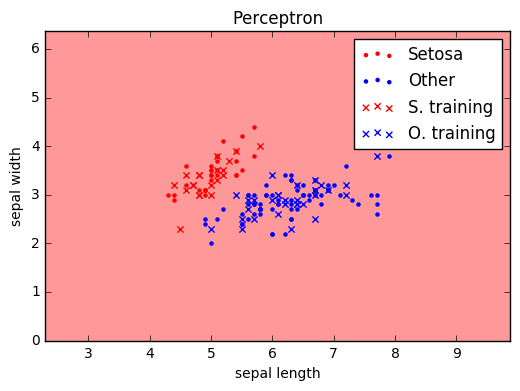

Epoch: 0
weights: [ 1.  2.  3.]
Efficiency (train) = 0.6
Efficiency (test)  = 0.7
Efficiency (all)   = 0.6666666666666667


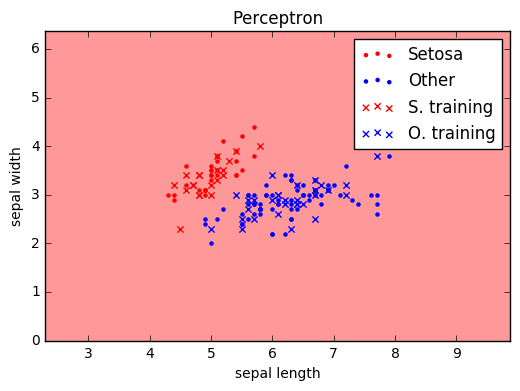

Epoch: 1
weights: [ 0.67068444  0.11450158  1.97630668]
Efficiency (train) = 0.6
Efficiency (test)  = 0.7
Efficiency (all)   = 0.6666666666666667


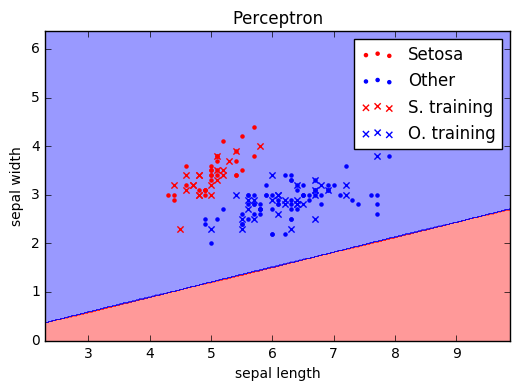

Epoch: 2
weights: [ 0.55962458 -0.50112217  1.62325102]
Efficiency (train) = 0.6
Efficiency (test)  = 0.7
Efficiency (all)   = 0.6666666666666667


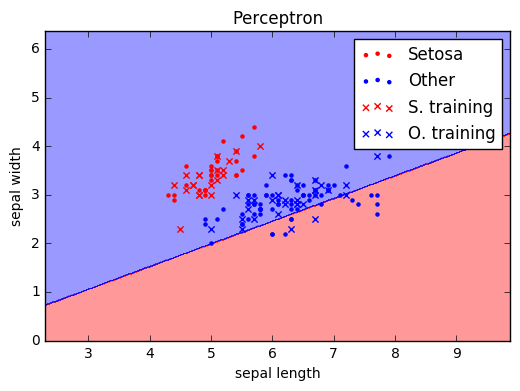

Epoch: 3
weights: [ 0.52076735 -0.69679432  1.49211862]
Efficiency (train) = 0.54
Efficiency (test)  = 0.5800000000000001
Efficiency (all)   = 0.5666666666666667


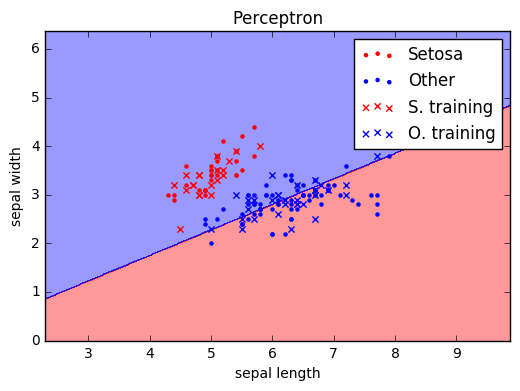

Epoch: 4
weights: [ 0.50580551 -0.75362703  1.43449609]
Efficiency (train) = 0.24
Efficiency (test)  = 0.31000000000000005
Efficiency (all)   = 0.2866666666666666


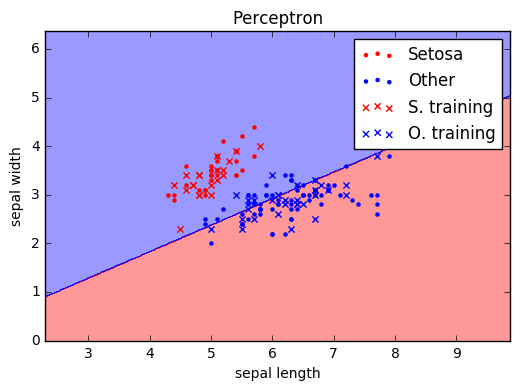

Epoch: 5
weights: [ 0.49876129 -0.76459785  1.40129478]
Efficiency (train) = 0.18000000000000005
Efficiency (test)  = 0.21999999999999997
Efficiency (all)   = 0.20666666666666667


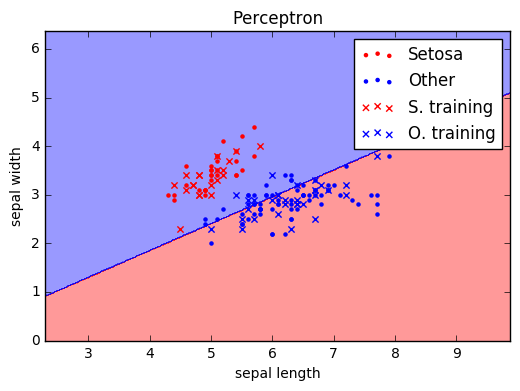

Epoch: 6
weights: [ 0.49434994 -0.76045872  1.37627779]
Efficiency (train) = 0.09999999999999998
Efficiency (test)  = 0.18999999999999995
Efficiency (all)   = 0.16000000000000003


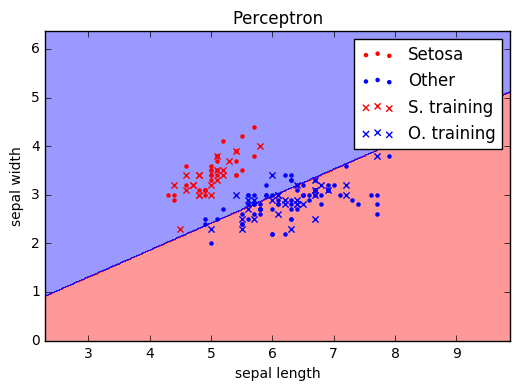

Epoch: 7
weights: [ 0.49082341 -0.75138043  1.35407394]
Efficiency (train) = 0.09999999999999998
Efficiency (test)  = 0.17000000000000004
Efficiency (all)   = 0.1466666666666666


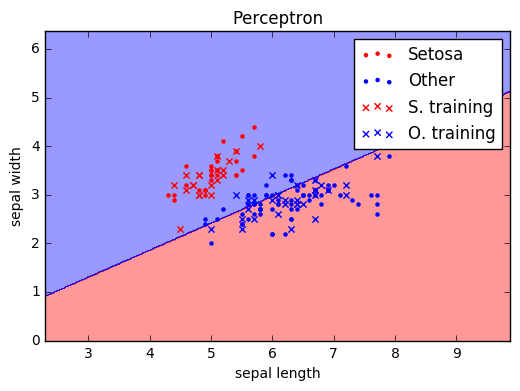

Epoch: 8
weights: [ 0.48760342 -0.74072652  1.33290591]
Efficiency (train) = 0.09999999999999998
Efficiency (test)  = 0.17000000000000004
Efficiency (all)   = 0.1466666666666666


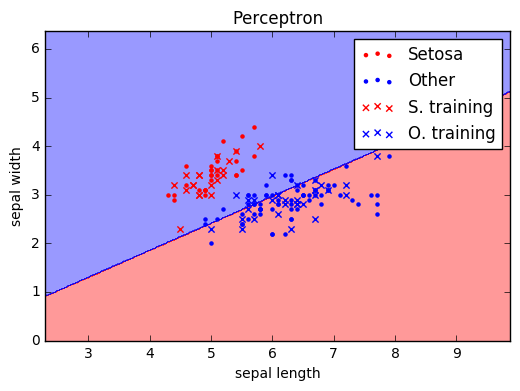

Epoch: 9
weights: [ 0.48449862 -0.72960905  1.31218505]
Efficiency (train) = 0.09999999999999998
Efficiency (test)  = 0.17000000000000004
Efficiency (all)   = 0.1466666666666666


In [30]:
ada = Adaline(X.shape[1])
ada.w_ = np.array([1, 2, 3], dtype=np.float64)

for e in range(10):
    
    ada.plot_decision_regions(X, Y, X_train, Y_train, 0.02)
    eff_all = ada.efficiency(X_all, Y_all)
    
    eff_train = ada.efficiency(X_train, Y_train)
    eff_test = ada.efficiency(X, Y)
    eff_all = ada.efficiency(X_all, Y_all)
    
    plt.show()

    print('Epoch:', e )
    print('weights:', ada.w_)
    print('Efficiency (train) =', eff_train)
    print('Efficiency (test)  =', eff_test)
    print('Efficiency (all)   =', eff_all)
    
    ada.learn(X_train, Y_train, eta=0.00001, epochs=50)

## Dependence on bad points

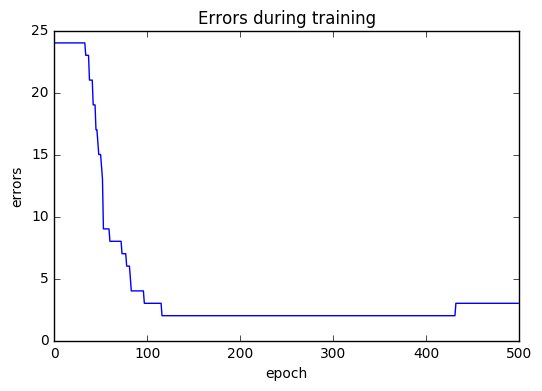

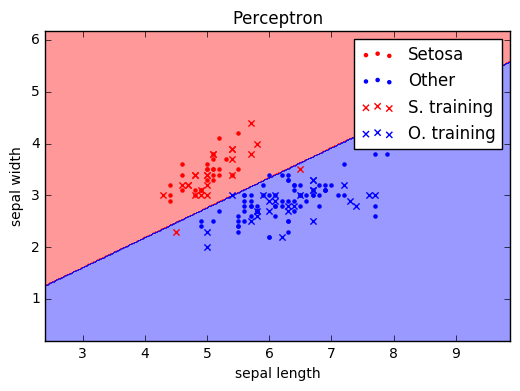

weights: [-0.09850818  0.43989061 -0.76193936]
Efficiency (train) = 0.94
Efficiency (test)  = 0.99
Efficiency (all)   = 0.9733333333333334


In [32]:
# fix the generated random numbers (2 seems to select a bad case)
np.random.seed(4)

# if you do not have the csv data file call fetch_iris_data() by removing the comment in the line below
# fetch_iris_data()

X_all, Y_all = load_iris_data()

# here we overwrite an existing point with a 'bad' one
X_all[0] = [6.5, 3.5]
Y_all[0] = -1

train_samples = int( len(X_all) / 3 )

# training data
X_train, Y_train = X_all[:train_samples], Y_all[:train_samples]

# data for testing the efficiency
X, Y = X_all[train_samples:], Y_all[train_samples:]

# training
ada = Adaline(X.shape[1])
ada.learn(X_train, Y_train, eta=0.0001, epochs=500)
ada.plot_train_errors()

ada.plot_decision_regions(X, Y, X_train, Y_train, 0.02)

eff_train = ada.efficiency(X_train, Y_train)
eff_test = ada.efficiency(X, Y)
eff_all = ada.efficiency(X_all, Y_all)

plt.show()

print('weights:', ada.w_)
print('Efficiency (train) =', eff_train)
print('Efficiency (test)  =', eff_test)
print('Efficiency (all)   =', eff_all)

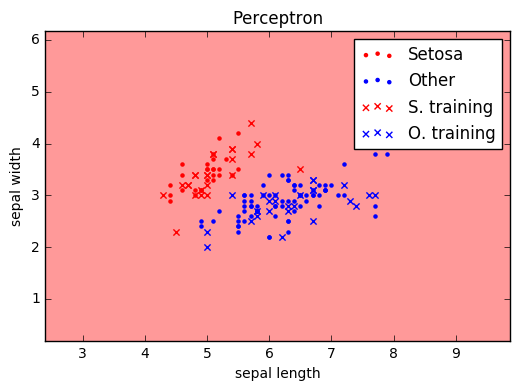

Epoch: 0
weights: [ 0.  0.  0.]
Efficiency (train) = 0.52
Efficiency (test)  = 0.73
Efficiency (all)   = 0.6599999999999999


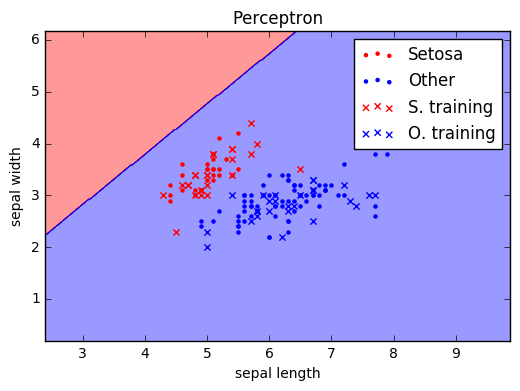

Epoch: 1
weights: [-0.00366099  0.03949291 -0.0406708 ]
Efficiency (train) = 0.52
Efficiency (test)  = 0.73
Efficiency (all)   = 0.6599999999999999


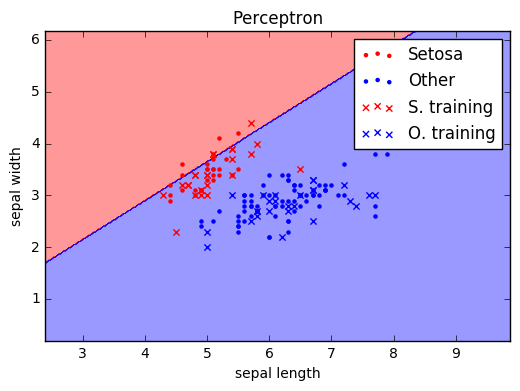

Epoch: 2
weights: [-0.00934184  0.0649361  -0.08641352]
Efficiency (train) = 0.5800000000000001
Efficiency (test)  = 0.79
Efficiency (all)   = 0.72


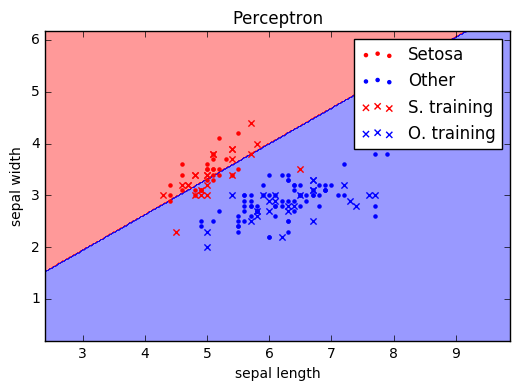

Epoch: 3
weights: [-0.0148394   0.08930567 -0.13041246]
Efficiency (train) = 0.84
Efficiency (test)  = 0.91
Efficiency (all)   = 0.8866666666666667


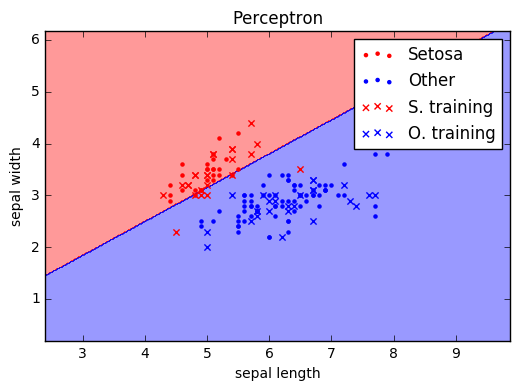

Epoch: 4
weights: [-0.02014664  0.11272619 -0.17269163]
Efficiency (train) = 0.88
Efficiency (test)  = 0.98
Efficiency (all)   = 0.9466666666666667


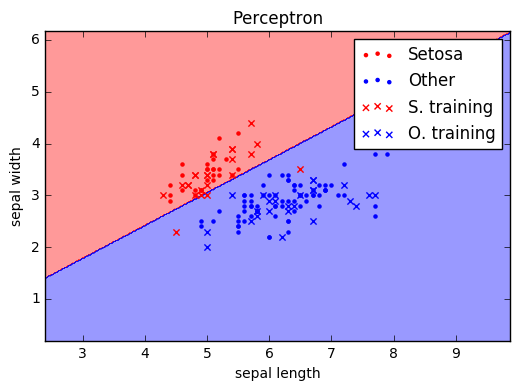

Epoch: 5
weights: [-0.02527089  0.13523522 -0.21331782]
Efficiency (train) = 0.94
Efficiency (test)  = 1.0
Efficiency (all)   = 0.98


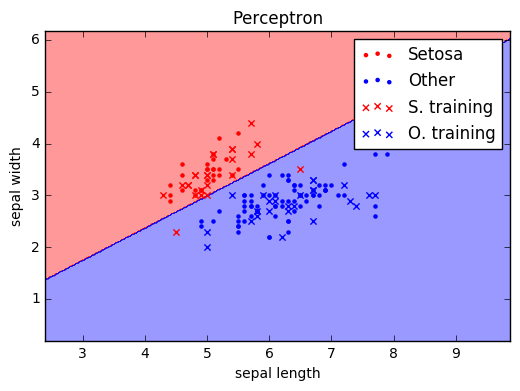

Epoch: 6
weights: [-0.03021924  0.15686832 -0.2523555 ]
Efficiency (train) = 0.96
Efficiency (test)  = 1.0
Efficiency (all)   = 0.9866666666666667


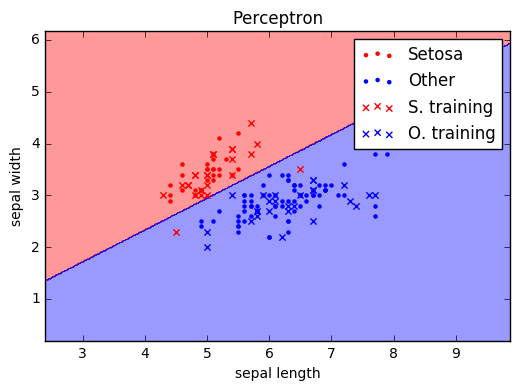

Epoch: 7
weights: [-0.03499854  0.17765965 -0.28986664]
Efficiency (train) = 0.96
Efficiency (test)  = 1.0
Efficiency (all)   = 0.9866666666666667


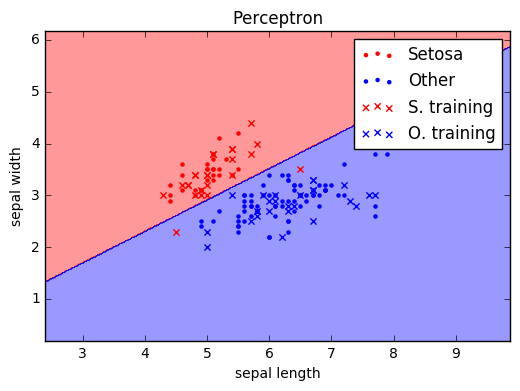

Epoch: 8
weights: [-0.03961537  0.19764205 -0.32591079]
Efficiency (train) = 0.96
Efficiency (test)  = 1.0
Efficiency (all)   = 0.9866666666666667


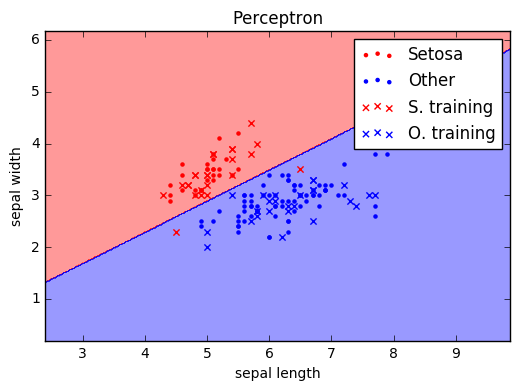

Epoch: 9
weights: [-0.04407603  0.21684707 -0.36054519]
Efficiency (train) = 0.96
Efficiency (test)  = 1.0
Efficiency (all)   = 0.9866666666666667


In [36]:
ada = Adaline(X.shape[1])

for e in range(10):
    
    ada.plot_decision_regions(X, Y, X_train, Y_train, 0.02)
    eff_all = ada.efficiency(X_all, Y_all)
    
    eff_train = ada.efficiency(X_train, Y_train)
    eff_test = ada.efficiency(X, Y)
    eff_all = ada.efficiency(X_all, Y_all)
    
    plt.show()

    print('Epoch:', e )
    print('weights:', ada.w_)
    print('Efficiency (train) =', eff_train)
    print('Efficiency (test)  =', eff_test)
    print('Efficiency (all)   =', eff_all)
    
    ada.learn(X_train, Y_train, eta=0.0001, epochs=20)

## Random data

In [37]:
def generate_random_data(numItems, vecSize=2):
    '''
    generates num items of radom data
    Y: an array of classes '-1 or 1'
    X: the corresponding data vectors
    '''
    
    # generate class labels -1 and 1
    Y = np.ones(numItems) - 2 * np.random.randint(2, size=numItems)

    # generate the data on basis of which the distinction should be made
    X = np.random.rand(numItems, vecSize)

    for n in range(vecSize):
        X[:, n] = X[: ,n] - 2 * Y * np.random.rand(numItems)

    return X, Y

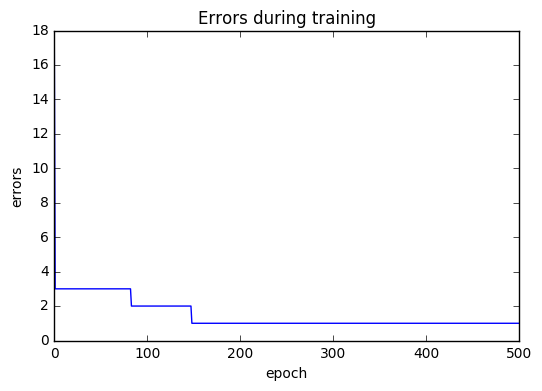

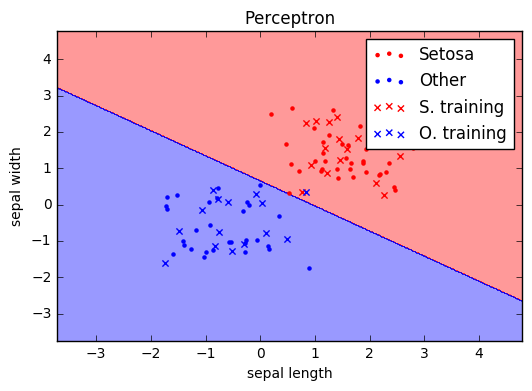

weights: [ 0.22334756 -0.23567525 -0.34085542]
Efficiency (train) = 0.9696969696969697
Efficiency (test)  = 1.0
Efficiency (all)   = 0.99


In [41]:
# fix the generated random numbers (2 seems to select a bad case)
np.random.seed(6)

# if you do not have the csv data file call fetch_iris_data() by removing the comment in the line below
# fetch_iris_data()

X_all, Y_all = generate_random_data(100)

# here we overwrite an existing point with a 'bad' one
X_all[0] = [6.5, 3.5]
Y_all[0] = -1

train_samples = int( len(X_all) / 3 )

# training data
X_train, Y_train = X_all[:train_samples], Y_all[:train_samples]

# data for testing the efficiency
X, Y = X_all[train_samples:], Y_all[train_samples:]

# training
ada = Adaline(X.shape[1])
ada.learn(X_train, Y_train, eta=.0001, epochs=500)
ada.plot_train_errors()

ada.plot_decision_regions(X, Y, X_train, Y_train, 0.02)

eff_train = ada.efficiency(X_train, Y_train)
eff_test = ada.efficiency(X, Y)
eff_all = ada.efficiency(X_all, Y_all)

plt.show()

print('weights:', ada.w_)
print('Efficiency (train) =', eff_train)
print('Efficiency (test)  =', eff_test)
print('Efficiency (all)   =', eff_all)

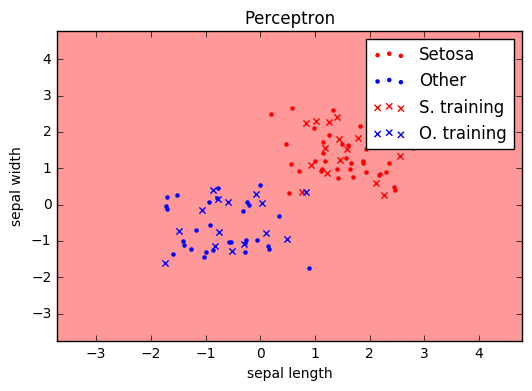

Epoch: 0
weights: [ 0.  0.  0.]
Efficiency (train) = 0.4545454545454546
Efficiency (test)  = 0.4477611940298507
Efficiency (all)   = 0.44999999999999996


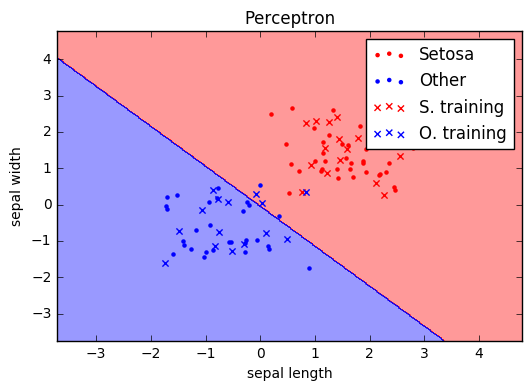

Epoch: 1
weights: [-0.00267976 -0.06993471 -0.06351431]
Efficiency (train) = 0.9090909090909091
Efficiency (test)  = 0.9701492537313433
Efficiency (all)   = 0.95


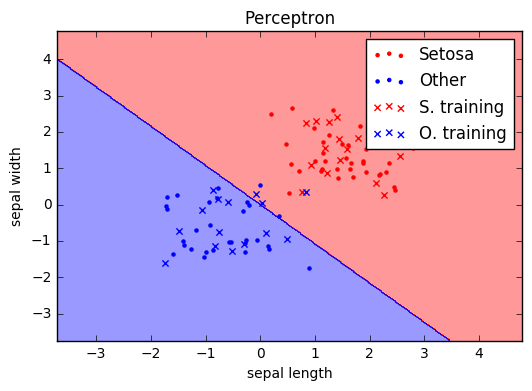

Epoch: 2
weights: [ 0.00016566 -0.12023707 -0.11124624]
Efficiency (train) = 0.9090909090909091
Efficiency (test)  = 0.9701492537313433
Efficiency (all)   = 0.95


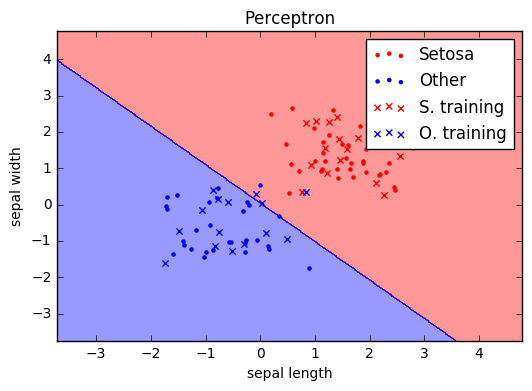

Epoch: 3
weights: [ 0.00676506 -0.15638664 -0.1475583 ]
Efficiency (train) = 0.9090909090909091
Efficiency (test)  = 0.9701492537313433
Efficiency (all)   = 0.95


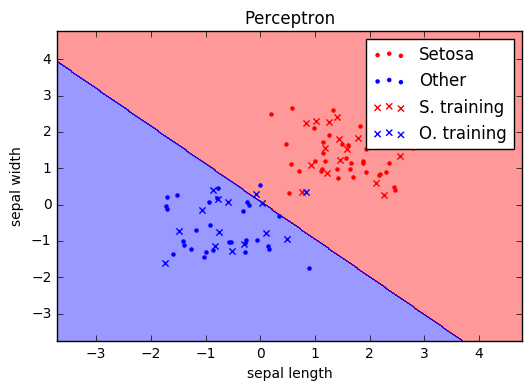

Epoch: 4
weights: [ 0.01585424 -0.18232868 -0.17559196]
Efficiency (train) = 0.9090909090909091
Efficiency (test)  = 0.9850746268656716
Efficiency (all)   = 0.96


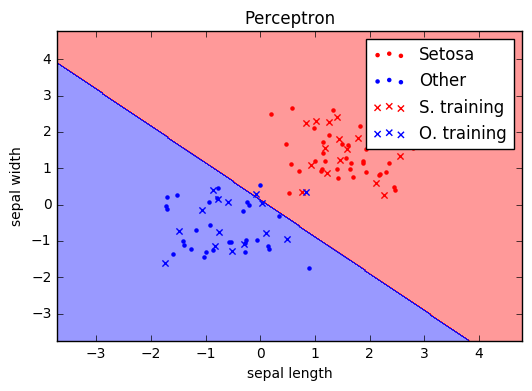

Epoch: 5
weights: [ 0.02653335 -0.20090418 -0.19760992]
Efficiency (train) = 0.9393939393939394
Efficiency (test)  = 0.9850746268656716
Efficiency (all)   = 0.97


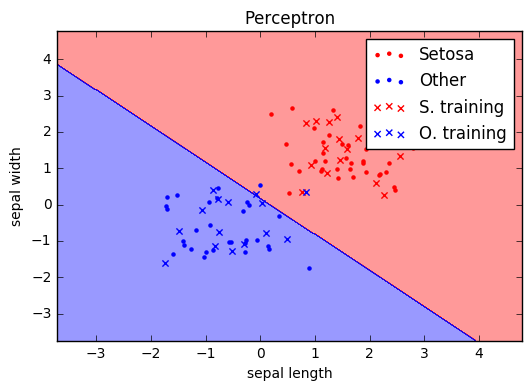

Epoch: 6
weights: [ 0.0381643  -0.21415929 -0.21524236]
Efficiency (train) = 0.9393939393939394
Efficiency (test)  = 0.9850746268656716
Efficiency (all)   = 0.97


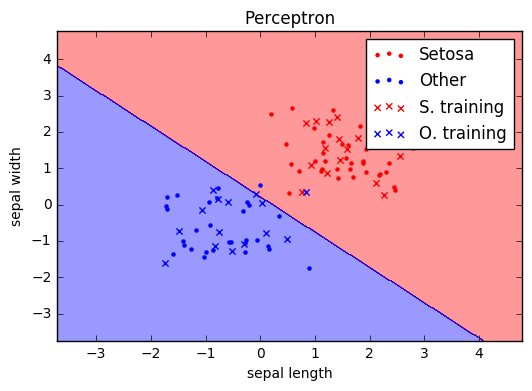

Epoch: 7
weights: [ 0.05029692 -0.22356812 -0.22966427]
Efficiency (train) = 0.9393939393939394
Efficiency (test)  = 0.9850746268656716
Efficiency (all)   = 0.97


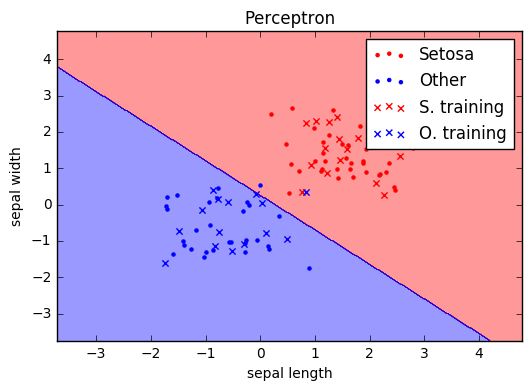

Epoch: 8
weights: [ 0.06261585 -0.23019298 -0.24172295]
Efficiency (train) = 0.9696969696969697
Efficiency (test)  = 0.9850746268656716
Efficiency (all)   = 0.98


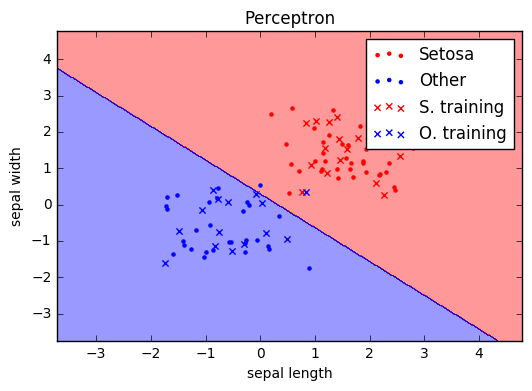

Epoch: 9
weights: [ 0.07490233 -0.23479974 -0.25202984]
Efficiency (train) = 0.9696969696969697
Efficiency (test)  = 0.9850746268656716
Efficiency (all)   = 0.98


In [43]:
ada = Adaline(X.shape[1])

for e in range(10):
    
    ada.plot_decision_regions(X, Y, X_train, Y_train, 0.02)
    eff_all = ada.efficiency(X_all, Y_all)
    
    eff_train = ada.efficiency(X_train, Y_train)
    eff_test = ada.efficiency(X, Y)
    eff_all = ada.efficiency(X_all, Y_all)
    
    plt.show()

    print('Epoch:', e )
    print('weights:', ada.w_)
    print('Efficiency (train) =', eff_train)
    print('Efficiency (test)  =', eff_test)
    print('Efficiency (all)   =', eff_all)
    
    ada.learn(X_train, Y_train, eta=0.0001, epochs=20)